In [115]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [109]:
points = 100
dimensions = 3
clusters = 10
X = np.random.rand(points,dimensions)

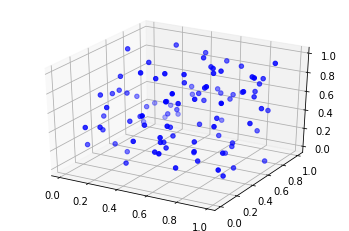

In [110]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

ax1.scatter(X[:,0],X[:,1],X[:,2],color="blue")

In [111]:
def connections(dataPoints, n):
    distances = np.zeros((points, points))
    rows, cols = np.triu_indices(points, 1)
    distances[rows, cols] = np.array([np.linalg.norm(X[r,]-X[c,]) for r,c in zip(rows, cols)])
    return [(i//points, i%points) for i in np.argsort(distances.flatten())[points*(points+1)//2:]]

In [112]:
def hierClus(points, connections, goalClusters):
    labels = np.arange(points)
    clusters = points
    missed = 0
    while clusters > goalClusters:
        row1, row2 = connections[points-clusters+missed]
        if labels[row1] == labels[row2]:
            missed += 1
        else:
            labels[labels == labels[row2]] = labels[row1]
            clusters -= 1
    return labels
labels = hierClus(points, connections(X, points), clusters)

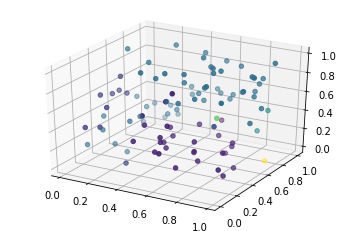

In [122]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

ax1.scatter(X[:,0], X[:,1], X[:,2], c=labels)